# ACSE-3 (Numerical Methods)  <a class="tocSkip">

## Lecture 4: Nonlinear Solvers (Root-Finding)  <a class="tocSkip">
    
###  Homework Exercises - Solutions<a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Bisection-method" data-toc-modified-id="Homework---Bisection-method-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Bisection method</a></span><ul class="toc-item"><li><span><a href="#Solution---Bisection-method" data-toc-modified-id="Solution---Bisection-method-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Bisection method</a></span></li></ul></li><li><span><a href="#Homework---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods" data-toc-modified-id="Homework---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - A single function for Newton, Quasi-Newton and Secant methods</a></span><ul class="toc-item"><li><span><a href="#Solution---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods" data-toc-modified-id="Solution---A-single-function-for-Newton,-Quasi-Newton-and-Secant-methods-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - A single function for Newton, Quasi-Newton and Secant methods</a></span></li></ul></li><li><span><a href="#Homework---Compare-methods-[$\star$]" data-toc-modified-id="Homework---Compare-methods-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Compare methods [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solutions---Compare-methods" data-toc-modified-id="Solutions---Compare-methods-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solutions - Compare methods</a></span></li></ul></li><li><span><a href="#Homework---Formulate-and-solve-a-nonlinear-financial-problem" data-toc-modified-id="Homework---Formulate-and-solve-a-nonlinear-financial-problem-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Formulate and solve a nonlinear financial problem</a></span><ul class="toc-item"><li><span><a href="#Solution---Formulate-and-solve-a-nonlinear-financial-problem" data-toc-modified-id="Solution---Formulate-and-solve-a-nonlinear-financial-problem-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Formulate and solve a nonlinear financial problem</a></span></li></ul></li><li><span><a href="#Homework---Implement-a-nonlinear-system-solver-[$\star\star$]" data-toc-modified-id="Homework---Implement-a-nonlinear-system-solver-[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Implement a nonlinear system solver [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-a-nonlinear-system-solver" data-toc-modified-id="Solution---Implement-a-nonlinear-system-solver-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Implement a nonlinear system solver</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Bisection method

Implement the bisection algorithm described in the Lecture - see if you can implement both a stand-alone function and apply it to our two problems (and compare with the Scipy result).  

You can base this on the algorithm description in class, or the psuedo-code available here <https://en.wikipedia.org/wiki/Bisection_method#Algorithm>.

### Solution - Bisection method

In [2]:
def bisection(f, a, b, atol=1.0e-6, max_its=100):
    """ Function to implement the bisection root-finding method.
    
    f is the function we are trying to find a root of.
    
    a and b are the initial interval.
    
    atol is a stopping tolerance.
    
    max_its is the maximum number of iterations allowed.
    
    Returns the final estimate of the root and also prints out the number of function
    evaluations used.
    """
    n = 0
    fevals = 0
    while n <= max_its:
        c = (a+b)/2.
        if f(c) == 0. or (b-a)/2. < atol: # one function evaluation
            fevals += 1
            print('Bisection used', fevals, 'function evaluations')
            return c
        n += 1
        if np.sign(f(c)) == np.sign(f(a)):  # two function evaluations
            a = c
        else:
            b = c
        fevals += 2
    raise RuntimeError('Hit maximum number of iterations and no root found to tolerance within [a,b]')
    

# case 1
def f(x):
    return x - np.exp(-x)


a, b = -1., 1.
print('bisection(f, a, b) = ', bisection(f, a, b))
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')
    

# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


a, b = 0., 5.
print('bisection(f, a, b) = ', bisection(f, a, b))
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')


# case 3
def f(x):
    return np.tan(x) - x


a, b = 7.5 , 7.8
print('bisection(f, a, b) = ', bisection(f, a, b))
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')


# case 4
def f(x):
    return x - (np.tan(x) - .1) 


a, b = 0.6, 0.7
print('bisection(f, a, b) = ', bisection(f, a, b))
print('sop.bisect(f, a, b) = ',sop.bisect(f, a, b),'\n')

Bisection used 41 function evaluations
bisection(f, a, b) =  0.567143440246582
sop.bisect(f, a, b) =  0.5671432904109679 

Bisection used 45 function evaluations
bisection(f, a, b) =  2.790355086326599
sop.bisect(f, a, b) =  2.7903546180675676 

Bisection used 37 function evaluations
bisection(f, a, b) =  7.725252342224122
sop.bisect(f, a, b) =  7.725251836938332 

Bisection used 33 function evaluations
bisection(f, a, b) =  0.6316596984863281
sop.bisect(f, a, b) =  0.6316594726624317 



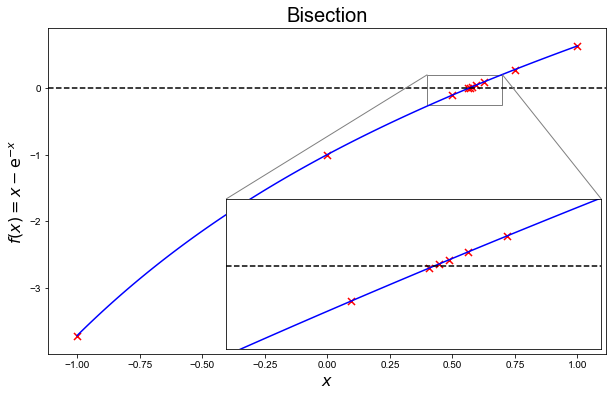

In [3]:
def plot_bisection(f, x1, x2, ax, tol=1.0e-2, inset=True, ixmin=0.4, ixmax=0.7, iymin=-0.25, iymax=0.2, zoom=5, loc0=4, loc1=2, loc2=1, flabel=''):
    # start by plotting the function over the given bounds (x1, x2)
    x = np.linspace(x1, x2, 100)
    y = f(x)
    ax.plot(x, y, 'b')
    # initialise the first interval
    f1 = f(x1)
    f2 = f(x2)
    x1s = x1
    x2s = x2
    # plot initial interval
    ax.scatter( [x1, x2], [f1, f2], marker='x', color='r', s=50)
    # plot midpoint, and update the appropriate interval limit
    while abs(x1-x2) > tol:
        x3 = 0.5*(x1 + x2)
        f3 = f(x3)
        ax.scatter( [x3], [f3], marker='x', color='r', s=50)
        if f2*f3 < 0.0:
            x1 = x3
            f1 = f3
        else:
            x2 = x3
            f2 = f3

    # add a zero line to the plot to help identify the root
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], color='k', ls='--')
    ax.set_xlim(xlim)
            
    # add a zoomed inset if 'inset=True'
    if inset:
        x1, x2 = x1s, x2s
        ax_ins = zoomed_inset_axes(ax, zoom, loc=loc0)
        # same code/algorithm as above
        x = np.linspace(x1, x2, 100)
        y = f(x)
        ax_ins.plot(x, y, color='b')
        f1 = f(x1)
        f2 = f(x2)
        ax_ins.scatter( [x1,x2], [f1,f2], marker='x', color='r', s=50)
        while abs(x1-x2) > tol:
            x3 = 0.5*(x1 + x2)
            f3 = f(x3)
            ax_ins.scatter( [x3], [f3], marker='x', color='r', s=50)
            if f2*f3 < 0.0:
                x1 = x3
                f1 = f3
            else:
                x2 = x3
                f2 = f3
        ax_ins.plot([ixmin,ixmax],[0.,0.], color='k',ls='--')
        ax_ins.set_xlim(ixmin, ixmax)
        ax_ins.set_ylim(iymin, iymax)
        ax_ins.get_xaxis().set_visible(False)
        ax_ins.get_yaxis().set_visible(False)
        # draw a box of area covered in main image and lines from corners to indicate zoom
        mark_inset(ax, ax_ins, loc1=loc1, loc2=loc2, fc='none', ec='0.5')
        
    xf = (x1 + x2)/2.0
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title('Bisection', fontsize=20)
    

def f(x):
    return x - np.exp(-x)

fig, ax1 = plt.subplots(figsize=(10,6))
plot_bisection(f, -1., 1., ax1, flabel=r'$f(x) = x - \mathrm{e}^{-x}$')

# save figure to use in lecture
#fig.savefig('bisection_example.png', dpi=600, format='png', facecolor='w', edgecolor='w')

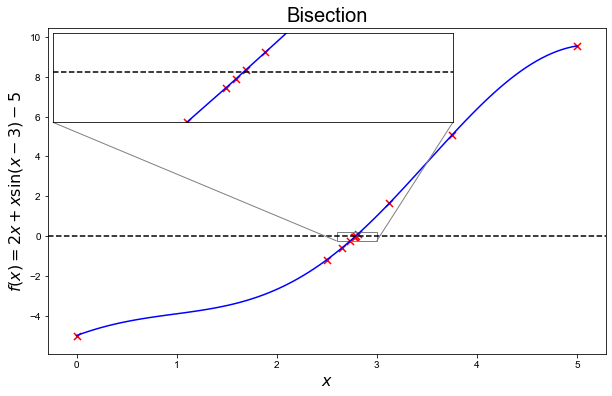

In [4]:
# Let's see what it looks like for our second example.

def f(x):
    return 2*x + x*np.sin(x-3) - 5


fig, ax1 = plt.subplots(figsize=(10,6))
plot_bisection(f, 0., 5., ax1, tol=1.0e-2, inset=True, 
               ixmin=2.6, ixmax=3., iymin=-0.25, iymax=0.2, zoom=10, loc0=2, loc1=3, loc2=4, flabel=r'$f(x) = 2x + x\sin(x-3) - 5$')

# save figure to use in lecture
#fig.savefig('bisection_example2.png', dpi=600, format='png', facecolor='w', edgecolor='w')

## Homework - A single function for Newton, Quasi-Newton and Secant methods

Use the Newton function from the lecture, but with different definitions of the `dfdx` function so that it actually implements the Newton, Quasi-Newton or Secant method. 

Test your methods by outputting the $x$ iterations in each case, and compare against iterations from our dedicated quasi-newton and secant functions (you'll need to update these to print out the iterations as well).

### Solution - A single function for Newton, Quasi-Newton and Secant methods

In [5]:
def newton2(f, x0, method = 'numdif', atol=1.0e-6, maxiter = 100, slope = None, dx=1.0e-4, x1=0.):
    """ Function which implements Newton, Quasi-Newton and Secant
    depending on method.
    
    If method == "newton" then slope needs to point to a function containing
    the derivative.
    
    If method == "numdif" then dx is the step size in the finite difference
    approximation to the derviative.
    
    If method == "secant" then another guess is needed - x1
    """
    assert method in ("newton", "numdif", "secant")
    
    if method == 'secant':
            x = [x0, x1]
    else:
            x = [x0]
    it = 0
    while True:
        # approximate gradient
        if method == 'newton':
            m = 1./slope(x[-1])
        elif method == 'numdif':
            m = 1./( (f(x[-1]+dx) - f(x[-1])) / dx )
        else: # must be secant
            m = 1./( (f(x[-1])-f(x[-2])) / (x[-1]-x[-2]) )
        # update
        x.append( x[-1] - m * f(x[-1]) )
        if abs(x[-1]-x[-2]) < atol:
            return x[-1]
        it += 1
        if it >= maxiter:
            print('hit max its without converging')
            break

In [6]:
# test functionality with two cases and compare with SciPy

# case 1
def f(x):
    return x - np.exp(-x)


def dfdx(x):
    return 1 + np.exp(-x)


x0 = -1.  # initial guess
print('SciPy:', sop.newton(f, x0, dfdx))
print("newton2 (method = newton): ", newton2(f, x0, method = 'newton', slope = dfdx))
print("newton2 (method = numdif): ", newton2(f, x0))
x1 = x0 + 0.1
print("newton2 (method = secant): ", newton2(f, x0, method = 'secant', x1=-0.9))


# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)


x0 = 0.  # initial guess
print('SciPy:', sop.newton(f, x0, dfdx))
print('newton2 (method = newton): ', newton2(f, x0, method = 'newton', slope = dfdx))
print("newton2 (method = numdif): ", newton2(f, x0))
x1 = x0+0.1
print("newton2 (method = secant): ", newton2(f, x0, method = 'secant', x1=x1))

SciPy: 0.567143290409784
newton2 (method = newton):  0.5671432904097811
newton2 (method = numdif):  0.5671432904117686
newton2 (method = secant):  0.5671432904097837
SciPy: 2.7903546180673837
newton2 (method = newton):  2.7903546180673837
newton2 (method = numdif):  2.790354618067386
newton2 (method = secant):  2.7903546180673446


## Homework - Compare methods [$\star$]

Implement stand alone solvers for picard, bisection, newton, quasi-newton and secant, each of which returns the number of function evaluations. Test them against SciPy on several problems from the lecture.

Compare the number of function evaluations required to find the root of the problem

$$ f(x):= x - \exp(-x). $$

### Solutions - Compare methods

In [7]:
def picard(f, x, atol=1.0e-6):
    """ Function implementing Picard's method.
    
    f here is the function g(.) described in the lecture and we are solving x = g(x).
    
    x is an initial guess.
    
    atol is a user-defined (absolute) error tolerance.
    """
    # record number of function evaluations so we can later compare methods
    fevals = 0
    # initialise the previous x simply so that while loop argument is initially true
    x_prev = x + 2*atol
    while abs(x - x_prev) > atol:
        x_prev = x
        x = f(x_prev) # one function evaluation
        fevals += 1
        print('Current iteration solution: ',x)
    print('\nPicard used', fevals, 'function evaluations')
    return x



def g(x):
    return np.exp(-x)


print('\nSolution from Picard: ', picard(g, 0.9, atol=1.0e-7))  # 0.9 is our initial guess


# let's check our answer against a SciPy function.
def f(x):
    return x - np.exp(-x)

print('\nSolution from SciPy: ', sop.newton(f, 0.9))

# NB. if we tighten up the atol toelrance in our call to picard the answer gets closer to SciPy 
# but of course takes more iterations.

Current iteration solution:  0.4065696597405991
Current iteration solution:  0.6659307054401221
Current iteration solution:  0.5137951132027094
Current iteration solution:  0.5982209490817094
Current iteration solution:  0.5497888689549504
Current iteration solution:  0.5770716352569477
Current iteration solution:  0.5615403562006408
Current iteration solution:  0.570329875730725
Current iteration solution:  0.5653389163484923
Current iteration solution:  0.5681675528504282
Current iteration solution:  0.566562684236262
Current iteration solution:  0.5674726729169729
Current iteration solution:  0.5669565140929677
Current iteration solution:  0.5672492292377977
Current iteration solution:  0.5670832110967041
Current iteration solution:  0.5671773650126686
Current iteration solution:  0.5671239655566297
Current iteration solution:  0.5671542504764889
Current iteration solution:  0.5671370745155531
Current iteration solution:  0.5671468157234473
Current iteration solution:  0.56714129105

In [8]:
# a stand-alone newton solver that also outputs function evaluations

def newton(f, x0, dfdx, atol=1.0e-6):
    """ Function to implement the Newton-Raphson method
    
    f is the function we are trying to find a root of
    
    and dfdx is another function which return the derivative of f
    """
    x = [x0]
    fevals = 0
    while True:
        x.append(x[-1] - f(x[-1])/dfdx(x[-1]))  # two function evaluations (f and dfdx)
        fevals += 2
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (analytical derivative) used', fevals, 'function evaluations')
            return x[-1]

# case 1
def f(x):
    return x - np.exp(-x)


def dfdx(x):
    return 1 + np.exp(-x)


x0 = -1.  # initial guess
print(newton(f, x0, dfdx))
print(sop.newton(f, x0, dfdx))


# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


def dfdx(x):
    return 2 - np.sin(3-x) + x*np.cos(3-x)


x0 = 0.  # initial guess
print(newton(f, x0, dfdx))
print(sop.newton(f, x0, dfdx))

Newton (analytical derivative) used 10 function evaluations
0.5671432904097811
0.567143290409784
Newton (analytical derivative) used 10 function evaluations
2.7903546180673837
2.7903546180673837


In [9]:
# a stand-alone quasi-newton solver that also outputs function evaluations

def newton_numdif(f, x0, dx=1.0e-4, atol=1.0e-6):
    """ Function to implement quasi-Newton, i.e. Newton's method with a
    finite different approximation to the derivative.
    
    f is the function we are trying to find a root of.
    
    dx is a user-specified perturbation for use in the finite differenc formula -
    NB. some care needs to be taken over its selection
    
    Returns the final estimate of the root and also prints out the number of function
    evaluations used.
    """
    x = [x0]
    fevals = 0
    while 1:
        dfdx = (f(x[-1] + dx) - f(x[-1]))/(dx)  # two evaluations
        x.append(x[-1] - f(x[-1])/dfdx)  # one evaluation
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print('Newton (numerically approximated derivative) used', fevals, 'function evaluations')
            return x[-1]
        
# case 1
def f(x):
    return x - np.exp(-x)


x0 = -1.  # initial guess
print(newton_numdif(f, x0))
print(sop.newton(f, x0))


# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


x0 = 0.
print(newton_numdif(f, x0))
print(sop.newton(f, x0))

Newton (numerically approximated derivative) used 15 function evaluations
0.5671432904117686
0.5671432904097835
Newton (numerically approximated derivative) used 15 function evaluations
2.790354618067386
2.7903546180673837


In [10]:
# a stand-alone secant solver that also outputs function evaluations

def secant(f, x0, x1, atol=1.e-6):
    """ Function to implement the secant method.
    
    f is the function we are trying to find a root of.
    
    x0 and x1 are two different guess as the root.
    
    Returns the final estimate of the root and also prints out the number of function
    evaluations used.
    """
    x = [x0, x1]
    fevals = 0
    while 1:
        # three evaluations
        x.append( x[-1] - f(x[-1]) * ((x[-1]-x[-2])/(f(x[-1])-f(x[-2]))) )
        fevals += 3
        if abs(x[-1]-x[-2]) < atol:
            print('Secant used', fevals, 'function evaluations')
            return x[-1]
        
        
# case 1
def f(x):
    return x - np.exp(-x)


x0 = -1.
x1 = x0+0.1
print(secant(f, x0, x1))
print(sop.newton(f, x0),'\n')


# case 2        
def f(x):
    return 2*x + x*np.sin(x-3) - 5


x0 = 0.
x1 = x0+0.1
print(secant(f, x0, x1))
print(sop.newton(f, x0))

Secant used 21 function evaluations
0.5671432904097837
0.5671432904097835 

Secant used 18 function evaluations
2.7903546180673446
2.7903546180673837


In [11]:
# recall that Picard solves problem in form x = g(x)
def g(x):
    return np.exp(-x)

# whereas other find roots of f(x) = x - g(x), or more generally any f(x)
def f(x):
    return x - np.exp(-x)

# and some methods can make use of an analytically defined derivative
def dfdx(x):
    return 1 + np.exp(-x)


#start with the Scipy value
print('Scipy Newton/Secant estimates: ', sop.newton(f, -1., dfdx), sop.newton(f,-1.),'\n')
print(picard(g, -1.),'\n')
print(bisection(f, -1., 1.),'\n')
print(newton(f, -1., dfdx),'\n')
print(newton_numdif(f, -1.),'\n')
print(secant(f, -1., -0.8),'\n')


Scipy Newton/Secant estimates:  0.567143290409784 0.5671432904097835 

Current iteration solution:  2.718281828459045
Current iteration solution:  0.06598803584531254
Current iteration solution:  0.9361420643730866
Current iteration solution:  0.39213776313071663
Current iteration solution:  0.6756110332581404
Current iteration solution:  0.5088454041313444
Current iteration solution:  0.6011893089386103
Current iteration solution:  0.548159317490669
Current iteration solution:  0.5780127697904941
Current iteration solution:  0.5610121197891945
Current iteration solution:  0.5706312243222637
Current iteration solution:  0.5651685779292192
Current iteration solution:  0.5682643418564722
Current iteration solution:  0.5665078498509187
Current iteration solution:  0.5675037907853482
Current iteration solution:  0.5669388718892829
Current iteration solution:  0.5672592368525179
Current iteration solution:  0.5670775359748105
Current iteration solution:  0.5671805838224839
Current iteration

## Homework - Formulate and solve a nonlinear financial problem

Assume you invest a lump sum of £10,000 in a savings account. 

Interest on your savings is calculated (and [*compounded*](https://en.wikipedia.org/wiki/Compound_interest)) monthly at an annual interest rate of 5%. 

Every month you invest a further £500.  

Write a function to calculate the value of your investment as a function of time.

You can compare your function against online compound interest calculators, such as that at

<a href="https://www.thecalculatorsite.com/finance/calculators/compoundinterestcalculator.php">https://www.thecalculatorsite.com/finance/calculators/compoundinterestcalculator.php</a>


[To check your function you could enter into this online calculator £10000 as a base amount, 5% interest, 60 month (or 5 year) calculation period, £500 regular monthly investment, and a monthly compound interval.  You should find an investment balance of £46,978.31 at the end of the period.]


Use a nonlinear solver to work out how many years (or months) it would take you to build up £1M in your investment pot!


Answer: I make the answer 43.0927 years or 517.1120 months

### Solution - Formulate and solve a nonlinear financial problem

In [12]:
def value(p, n, r, y, d):
    """
    Calculator based on the equation and terminology found here:
    https://money.stackexchange.com/questions/16507/calculate-future-value-with-recurring-deposits
      
    p = initial value 
    n = compounding periods per year
    r = nominal interest rate, compounded n times per year = 4% = 0.04
    i = periodic interest rate = r/n 
    y = number of years 
    t = number of compounding periods = n*y
    d = periodic deposit 
    
    Returns value of investment at end of period.
    
    The formula for the future value of an annuity due is: 
    d*(((1 + i)^t - 1)/i)*(1 + i)    
    """
    i = r/float(n)
    t = n*y
    return p*(1.0 + i)**t + d*(((1.0 + i)**t - 1)/float(i))*(1.0 + i)

def g(x):
    """ Function to return investment as a function of years,
    based on the values given in question.
    """
    p = 10000.
    n = 12.
    r = 0.05
    #y = 5.
    d = 500.
    return value(p,n,r,x,d) 
    
# check against value given at above web calculator 
# after 5 years (60 months)
print('My function agrees with the online calculator: ',np.isclose(g(5),46978.31))

def f(x):
    desired_value = 1.e6 # we want to be a millionaire
    return g(x) - desired_value  

years = sop.newton(f,100)

print('Your investment is worth £1M after {0:.4f} years, or {1:.4f} months'.format(years, years*12.))

My function agrees with the online calculator:  True
Your investment is worth £1M after 43.0927 years, or 517.1120 months


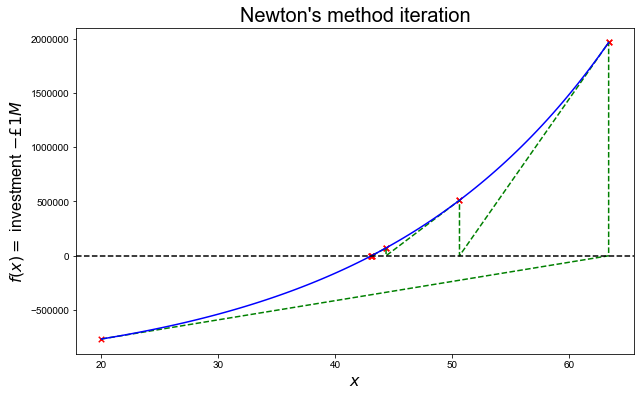

In [13]:
# Let's plot the convergence

def plot_newton(f, dx, x_0, atol, ax, inset=True, ixmin=3.0, ixmax=3.2, iymin=-0.1, iymax=0.1, zoom=8, loc0=1, loc1=3, loc2=2, maxiter=100, resfct=100, flabel=''):
    x_n = [x_0]
    y_n = [f(x_0)]    
    
    # Newton iteration
    i = 0
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    while 1:
        # approximate gradient
        dfdx = (f(x_n[-1]+dx) - f(x_n[-1])) / dx
        # Newton-Raphson update
        x_zero = x_n[-1] - ( f(x_n[-1]) / dfdx )
        x_n.append(x_zero)        
        y_n.append(0.)
        if abs(x_n[-1]-x_n[-2]) < atol:
            break
        x_n.append(x_zero)
        y_n.append(f(x_zero))
        i = i+1
        if i >= maxiter:
            break
        
    # the iteration results
    ax.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
    
    # the convergence pattern
    ax.plot(x_n, y_n, color='green', ls='--')
        
    # the function
    x = np.linspace( np.min(x_n), np.max(x_n), resfct)
    ax.plot(x, f(x), 'b')
    
    # zero line
    xlim = ax.get_xlim()
    ax.plot([xlim[0], xlim[1]], [0., 0.], 'k--')
    ax.set_xlim(xlim)

    # zoomed inset
    if inset:
        axins = zoomed_inset_axes(ax, zoom, loc=loc0)
        axins.scatter(x_n, f(np.array(x_n)), marker='x', color='red', s=30)
        axins.plot(x_n, y_n, color='green', ls='--')
        axins.plot(x, f(x), 'b')
        axins.plot([ixmin,ixmax],[0.,0.], 'k--')
        axins.set_xlim(ixmin, ixmax)
        axins.set_ylim(iymin, iymax)
        axins.get_xaxis().set_visible(False)
        axins.get_yaxis().set_visible(False)
        mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
    
    ax.set_xlabel('$x$', fontsize=16)
    if not flabel:
        fl = '$f(x)$'
    else:
        fl = flabel
    ax.set_ylabel(fl, fontsize=16)
    ax.set_title("Newton's method iteration", fontsize=20)

fig, ax1 = plt.subplots(figsize=(10,6))
x0 = 20.
plot_newton(f, 1.e-3, x0, 1.e-2, ax1, inset=False, flabel=r'$f(x) = $ investment $-£1M$')

## Homework - Implement a nonlinear system solver [$\star\star$]

This is Kiusalaas Problem set 4.1, Problem 24.

The equations

$$\begin{align*}
\sin x + 3 \cos x − 2 & = 0 \\[5pt]
\cos x − \sin y + \frac{1}{5} & = 0
\end{align*}$$

have a solution in the vicinity of the point $(x,y)=(1, 1)$ (i.e. you are well advised to use this as your starting point. 

Based upon the description from the lecture, implement a version of Newton's method that operates on a **system of equations** and use it to find the root of this problem.

[You can use a numerical approximation method to calculate the Jacobian and `scipy.linalg.solve` to solve the linear system required to yield the iteration update].

You can compare your implementation against the solution obtained in this lecture for scalar cases, and then for systems you could compare against [`scipy.optimize.root`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.root.html).

Answer: $(x,y)=(0.7911678,\; 1.12673723)$.

### Solution - Implement a nonlinear system solver

In [14]:
def jacobian(f, x, dx):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(x)
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(x_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
    return J
    
    
def newton_system_numdif(f, x, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, x, h)
        dx = sl.solve(J, -f(x))
        x += dx
        if sl.norm(dx, np.inf) < atol:
            return x, it+1
    print('Hit max_its without converging')
          
# first check the new implementation recreates our old SCALAR algorithm results        
               
# case 1
def f(x):
    return x - np.exp(-x)


x0 = -1.  # initial guess
root, its = newton_system_numdif(f, np.array([x0]))
print('Result from newton_system_numdif: {0:.12f} in {1:d} iterations'.format(root[0], its))
print('We have agreement between our new newton system solver'
      ' and our older scalar newton solver: ',np.isclose(root,newton_numdif(f, x0)))

# case 2
def f(x):
    return 2*x + x*np.sin(x-3) - 5


x0 = 0.
root, its = newton_system_numdif(f, np.array([x0]))
print('\nResult from newton_system_numdif: {0:.12f} in {1:d} iterations'.format(root[0], its))
print('We have agreement between our new newton system solver'
      ' and our older scalar newton solver: ',np.isclose(root,newton_numdif(f, x0)))


Result from newton_system_numdif: 0.567143290412 in 5 iterations
Newton (numerically approximated derivative) used 15 function evaluations
We have agreement between our new newton system solver and our older scalar newton solver:  [ True]

Result from newton_system_numdif: 2.790354618067 in 5 iterations
Newton (numerically approximated derivative) used 15 function evaluations
We have agreement between our new newton system solver and our older scalar newton solver:  [ True]


In [15]:
# now an actual vector problem from Kiusalaas
# problem set 4.1, problem 24
def f(x):
    f = np.zeros(len(x))
    f[0] = np.sin(x[0]) + 3.0*np.cos(x[1]) - 2.0
    f[1] = np.cos(x[0]) - np.sin(x[1]) + 0.2
    return f

x0 = np.array([1.0, 1.0])
root, its = newton_system_numdif(f, x0)
# use scipy.optimize.root
sol = sop.root(f, x0)
print('\nResult from newton_system_numdif: ',root,' in ', its, 'iterations')
print('\nScipy result: ', sol.x)


Result from newton_system_numdif:  [0.7911678  1.12673723]  in  4 iterations

Scipy result:  [0.7911678  1.12673723]
